<a href="https://colab.research.google.com/github/a31kim/python-dc-balti-incarceration-income/blob/main/male_incarceration_income_baltimore_dc_adamkim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Relationship Between Incarceration Rates and Household Income
* This analysis uses data from adult males in Baltimore and D.C.
* Is there a disctinctive relationship/correlation between the incarceration of a community and its average household income?
* What conclusions, if any, can be drawn from this analysis? Can the relationship be effectively shown with graphs?

## Import Libraries

In [7]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

## Import Data

In [33]:
# Baltimore Incarceration Rates
df_balti_jail = pd.read_csv("https://raw.githubusercontent.com/a31kim/python-dc-balti-incarceration-income/main/original%20datasets/balti_jail.csv")

# Baltimore Household Incomes
df_balti_income = pd.read_csv("https://raw.githubusercontent.com/a31kim/python-dc-balti-incarceration-income/main/original%20datasets/balti_income.csv")

# DC Incarceration Rates
df_dc_jail = pd.read_csv("https://raw.githubusercontent.com/a31kim/python-dc-balti-incarceration-income/main/original%20datasets/dc_jail.csv")

# DC Household Incomes
df_dc_income = pd.read_csv("https://raw.githubusercontent.com/a31kim/python-dc-balti-incarceration-income/main/original%20datasets/dc_income.csv")

## Data Overview

In [34]:
df_balti_jail.head(3)

,tract,Name,City,incarceration
0,24510120500,Greenmount West,Baltimore,0.2523
1,24510080800,Broadway East,Baltimore,0.2354
2,24510200400,Shipley Hill,Baltimore,0.2334


In [35]:
df_balti_income.head(3)

,tract,Name,City,income
0,24510120500,Greenmount West,Baltimore,15844
1,24510080800,Broadway East,Baltimore,14042
2,24510200400,Shipley Hill,Baltimore,13860


In [36]:
df_dc_jail.head(3)

,tract,Name,City,incarceration
0,11001000802,Northwest Washington,Washington,0.0416
1,11001006700,Southeast Washington,Washington,0.0408
2,11001000902,Northwest Washington,Washington,0.0321


In [37]:
df_dc_income.head(3)

,tract,Name,City,income
0,11001000802,Northwest Washington,Washington,61750.0
1,11001006700,Southeast Washington,Washington,59308.0
2,11001000902,Northwest Washington,Washington,55108.0


## Merging Data

### Baltimore

In [38]:
# Renaming Column Names for Incarceration and Income

df_balti_jail = df_balti_jail.rename(columns={"incarceration": "Metric"})
df_balti_income = df_balti_income.rename(columns={"income": "Metric"})

In [39]:
# Merge

df_balti_merge = pd.merge(df_balti_jail, 
                          df_balti_income[["tract", "Name", "Metric"]],
                                       on = "tract",
                                       how = "inner")

In [40]:
df_balti_merge.head(5)

,tract,Name_x,City,Metric_x,Name_y,Metric_y
0,24510120500,Greenmount West,Baltimore,0.2523,Greenmount West,15844
1,24510080800,Broadway East,Baltimore,0.2354,Broadway East,14042
2,24510200400,Shipley Hill,Baltimore,0.2334,Shipley Hill,13860
3,24510170100,Downtown,Baltimore,0.2090,Downtown,21013
4,24510080400,Broadway East,Baltimore,0.2084,Broadway East,19776


In [41]:
# Deleting Unnecessary Columns, Renaming

del df_balti_merge["City"]
del df_balti_merge["Name_y"]
df_balti_merge = df_balti_merge.rename(columns={"Name_x": "Neighborhood",
                                                "Metric_x": "Incarceration Rate",
                                                "Metric_y": "Household Income"})

In [42]:
df_balti_merge.head(5)

,tract,Neighborhood,Incarceration Rate,Household Income
0,24510120500,Greenmount West,0.2523,15844
1,24510080800,Broadway East,0.2354,14042
2,24510200400,Shipley Hill,0.2334,13860
3,24510170100,Downtown,0.2090,21013
4,24510080400,Broadway East,0.2084,19776


### DC

In [43]:
df_dc_jail = df_dc_jail.rename(columns={"incarceration": "Metric"})
df_dc_income = df_dc_income.rename(columns={"income": "Metric"})

In [44]:
df_dc_merge = pd.merge(df_dc_jail, 
                          df_dc_income[["tract", "Name", "Metric"]],
                                       on = "tract",
                                       how = "inner")

In [45]:
df_dc_merge.head(5)

,tract,Name_x,City,Metric_x,Name_y,Metric_y
0,11001000802,Northwest Washington,Washington,0.0416,Northwest Washington,61750.0
1,11001006700,Southeast Washington,Washington,0.0408,Southeast Washington,59308.0
2,11001000902,Northwest Washington,Washington,0.0321,Northwest Washington,55108.0
3,11001006600,Capitol Hill,Washington,0.0316,Capitol Hill,60229.0
4,11001004202,Northwest Washington,Washington,0.0289,Northwest Washington,50860.0


In [46]:
# Deleting Unnecessary Columns, Renaming

del df_dc_merge["City"]
del df_dc_merge["Name_y"]
df_dc_merge = df_dc_merge.rename(columns={"Name_x": "Neighborhood",
                                                "Metric_x": "Incarceration Rate",
                                                "Metric_y": "Household Income"})

In [47]:
df_dc_merge.head(5)

,tract,Neighborhood,Incarceration Rate,Household Income
0,11001000802,Northwest Washington,0.0416,61750.0
1,11001006700,Southeast Washington,0.0408,59308.0
2,11001000902,Northwest Washington,0.0321,55108.0
3,11001006600,Capitol Hill,0.0316,60229.0
4,11001004202,Northwest Washington,0.0289,50860.0


## Combination Graphs

### Baltimore

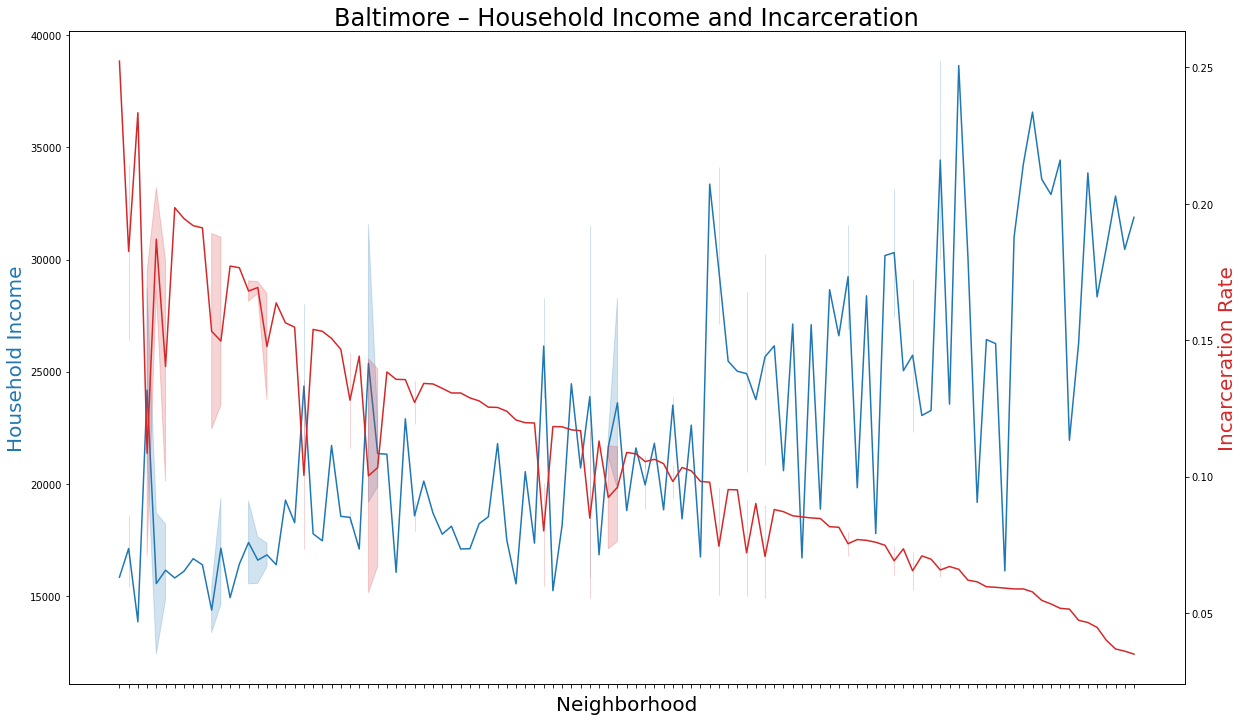

In [48]:
# Combination Graph

fig, ax1 = plt.subplots(figsize=(20,12))
color = "tab:blue"

# Bar Plot
ax1.set_title("Baltimore – Household Income and Incarceration", fontsize=24)
ax1.set_xlabel("Neighborhood", fontsize=20)
ax1.set_ylabel("Household Income", fontsize=20, color = color)
g1 = sns.lineplot(x = "Neighborhood", y = "Household Income", data = df_balti_merge, color = color)
g1.set(xticklabels = [])

ax2 = ax1.twinx()
color = "tab:red"

# Line Plot
ax2.set_ylabel("Incarceration Rate", fontsize=20, color = color)
g2 = sns.lineplot(x = "Neighborhood", y = "Incarceration Rate", data = df_balti_merge, sort = False, color = color)
g2.set(xticklabels = [])

plt.show()

### DC



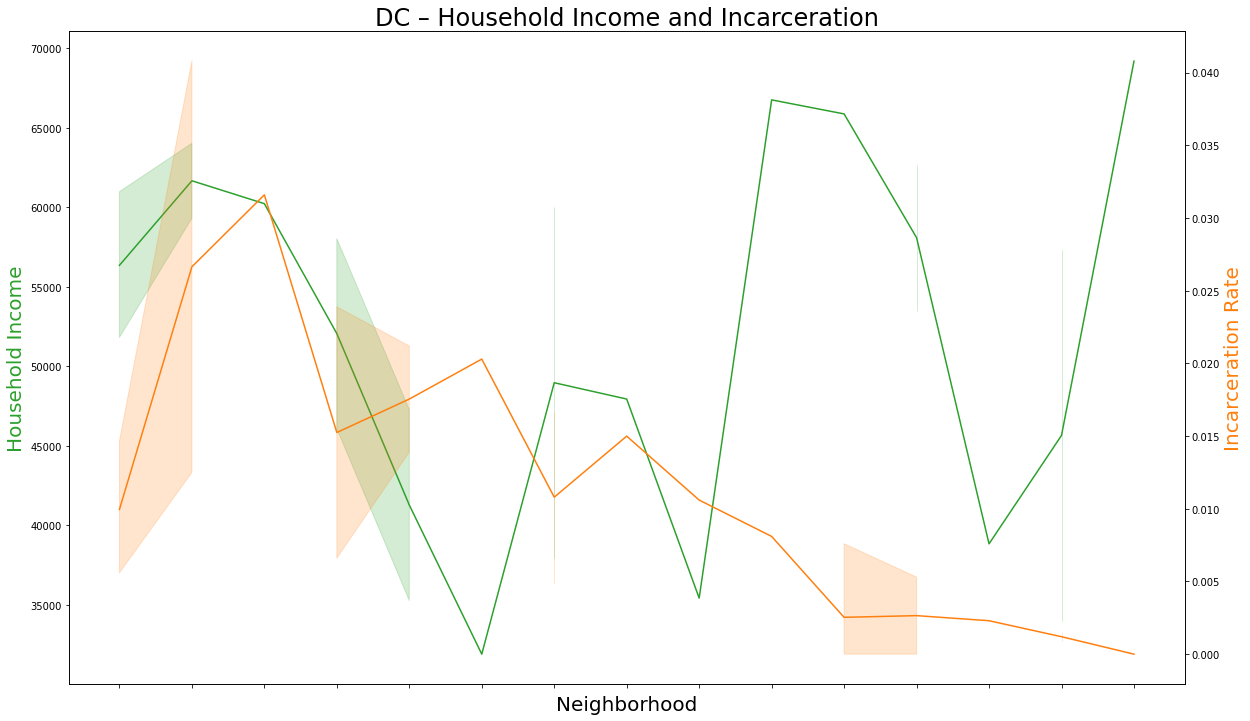

In [49]:
# Combination Graph

fig, ax1 = plt.subplots(figsize=(20,12))
color = "tab:green"

# Bar Plot
ax1.set_title("DC – Household Income and Incarceration", fontsize=24)
ax1.set_xlabel("Neighborhood", fontsize=20)
ax1.set_ylabel("Household Income", fontsize=20, color = color)
g1 = sns.lineplot(x = "Neighborhood", y = "Household Income", data = df_dc_merge, color = color)
g1.set(xticklabels = [])

ax2 = ax1.twinx()
color = "tab:orange"

# Line Plot
ax2.set_ylabel("Incarceration Rate", fontsize=20, color = color)
g2 = sns.lineplot(x = "Neighborhood", y = "Incarceration Rate", data = df_dc_merge, sort = False, color = color)
g2.set(xticklabels = [])

plt.show()